In [7]:
## Activity 2.3 - Feature Scaling [ Standarization and Normalization ]

#Designed by: Ashwini Mathur , Dr. Shabbeer B, Ms Achala H and Ms Shanti K

In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt

In [4]:
# Import the datsets from sklearn library - Just for Demonstration pupose
iris = datasets.load_iris()

In [6]:
# Manually load the Iris flower dataset from a CSV file
iris_df = pd.read_csv("datasets/Iris.csv")

# Slice all rows except the last one using iloc
sliced_iris_df = iris_df.drop(['Species'],axis=1)
taregt = iris_df['Species']

# View the sliced DataFrame
print(sliced_iris_df)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      1            5.1           3.5            1.4           0.2
1      2            4.9           3.0            1.4           0.2
2      3            4.7           3.2            1.3           0.2
3      4            4.6           3.1            1.5           0.2
4      5            5.0           3.6            1.4           0.2
..   ...            ...           ...            ...           ...
145  146            6.7           3.0            5.2           2.3
146  147            6.3           2.5            5.0           1.9
147  148            6.5           3.0            5.2           2.0
148  149           10.2           3.4           11.4           2.3
149  152            5.9           3.0           59.1           9.8

[150 rows x 5 columns]


### Study of Outliers in the Dataset : 

    1. Z-Score Method **[ Standardization technique ]**
    2. IQR / Data Visualization {BOX PLOT} method

In [9]:
#Calculate the z score
z_scores = (sliced_iris_df - sliced_iris_df.mean())/sliced_iris_df.std()
z_scores

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-1.714184,-0.683194,0.187307,-0.564658,-0.542217
1,-1.691179,-0.847819,-0.112224,-0.564658,-0.542217
2,-1.668174,-1.012444,0.007588,-0.585127,-0.542217
3,-1.645169,-1.094756,-0.052318,-0.544190,-0.542217
4,-1.622164,-0.765506,0.247213,-0.564658,-0.542217
...,...,...,...,...,...
145,1.621550,0.633806,-0.112224,0.213145,0.339095
146,1.644555,0.304556,-0.411755,0.172208,0.171226
147,1.667561,0.469181,-0.112224,0.213145,0.213194
148,1.690566,3.514743,0.127401,1.482194,0.339095


In [10]:
threshold = 3  # Adjust threshold as needed
outliers = sliced_iris_df[abs(z_scores) > threshold]
print("Outliers detected using Z-score method:\n", outliers)

Outliers detected using Z-score method:
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0   NaN            NaN           NaN            NaN           NaN
1   NaN            NaN           NaN            NaN           NaN
2   NaN            NaN           NaN            NaN           NaN
3   NaN            NaN           NaN            NaN           NaN
4   NaN            NaN           NaN            NaN           NaN
..   ..            ...           ...            ...           ...
145 NaN            NaN           NaN            NaN           NaN
146 NaN            NaN           NaN            NaN           NaN
147 NaN            NaN           NaN            NaN           NaN
148 NaN           10.2           NaN            NaN           NaN
149 NaN            NaN           NaN           59.1           9.8

[150 rows x 5 columns]


In [11]:
outliers.isna().sum()

Id               150
SepalLengthCm    148
SepalWidthCm     149
PetalLengthCm    149
PetalWidthCm     147
dtype: int64

In [12]:
#Calculate the zscore using pre-build method in scipy library
from scipy import stats

# Specify columns to check for outliers
columns_to_check = ['SepalLengthCm']

# Calculate Z-scores for each column
#z_scores = stats.zscore(sliced_iris_df[columns_to_check])
z_scores = stats.zscore(sliced_iris_df)

# Define a threshold for outlier detection (e.g., 3 standard deviations)
threshold = 3
outlier_indices = (z_scores > threshold).any(axis=1)
outliers_df = sliced_iris_df[outlier_indices]

print("Rows with Outliers:", outliers_df)

Rows with Outliers:       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
130  131            7.4          22.8            6.1          19.9
141  142           15.9           3.1            5.1           2.3
142  143            5.8           2.7            5.1          19.9
148  149           10.2           3.4           11.4           2.3
149  152            5.9           3.0           59.1           9.8


In [13]:
outlier_indices.sum()

5

In [14]:
# Calculate IQR for each feature
IQR = sliced_iris_df.quantile(0.95) - sliced_iris_df.quantile(0.05)

# Identify outliers based on IQR
outliers_iqr = sliced_iris_df[((sliced_iris_df < (sliced_iris_df.quantile(0.25) - 1.5 * IQR)) | (sliced_iris_df > (sliced_iris_df.quantile(0.95) + 1.5 * IQR))).any(axis=1)]
print(f"Possible outliers using IQR: {outliers_iqr}")

Possible outliers using IQR:       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
130  131            7.4          22.8            6.1          19.9
141  142           15.9           3.1            5.1           2.3
142  143            5.8           2.7            5.1          19.9
149  152            5.9           3.0           59.1           9.8


<AxesSubplot:>

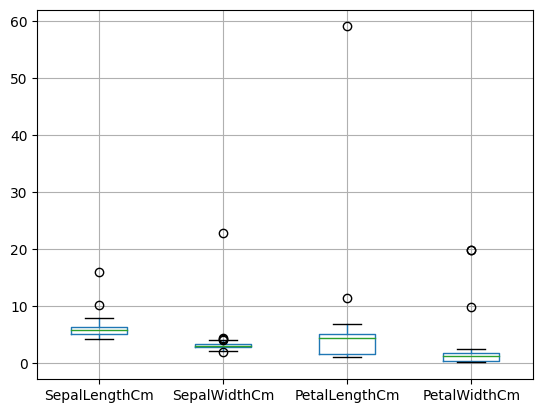

In [20]:
sliced_iris_df[['SepalLengthCm' ,'SepalWidthCm',  'PetalLengthCm' , 'PetalWidthCm']].boxplot()

**Different Methods to remove outliers** <br>
01. Direct <br>
02. Quantile-Based Capping and Flooring [self]<br>
03. Mean/Median Imputation [self] <br>

In [21]:
#Direct Method - Remove the outlier indices
sliced_iris_df = sliced_iris_df[~outlier_indices]
sliced_iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
143,144,6.8,3.2,5.9,2.3
144,145,6.7,3.3,5.7,2.5
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
